## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy  as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


b. Use the cell below to find the number of rows in the dataset.

In [4]:
print("The dataset contains {} columns and {} rows.".format(df.shape[0], df.shape[1]))

The dataset contains 294478 columns and 5 rows.


c. The number of unique users in the dataset.

In [5]:
print("The number of unique users in the dataset is {} users.".format(df.user_id.nunique()))

The number of unique users in the dataset is 290584 users.


d. The proportion of users converted.

In [6]:
#df.converted.sum()/df.user_id.nunique()*100

In [7]:
print("The proportion of user converted is {:.0f}%.".format(df.converted.mean()*100))

The proportion of user converted is 12%.


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [9]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [10]:
df[((df.landing_page == "new_page")&(df.group != "treatment")) | 
   ((df.landing_page != "new_page")&(df.group == "treatment"))].shape[0]

3893

In [11]:
df[((df.landing_page == "new_page")&(df.group == "control")) | 
   ((df.landing_page == "old_page")&(df.group == "treatment"))].shape[0]

3893

In [12]:
new_control   = df[((df.landing_page == "new_page")&(df.group == "control"))].shape[0]
old_treatment = df[((df.landing_page == "old_page")&(df.group == "treatment"))].shape[0]
new_control, old_treatment

(1928, 1965)

In [13]:
print("The number of times the new_page and treatment don't match is {} times.".format(new_control + old_treatment))

The number of times the new_page and treatment don't match is 3893 times.


f. Do any of the rows have missing values?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [15]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [16]:
df.isnull().values.any()

False

In [17]:
print("There is no missing values")

There is no missing values


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [18]:
df2 = df[((df.landing_page == "new_page")&(df.group == "treatment")) | 
         ((df.landing_page == "old_page")&(df.group == "control"))]

In [19]:
print("The original data set contains {} rows and we droped {} rows and the result is {} rows"
      .format(df.shape[0], new_control + old_treatment, df2.shape[0]))

The original data set contains 294478 rows and we droped 3893 rows and the result is 290585 rows


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [22]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [23]:
print("The duplicated user id is 773192")

The duplicated user id is 773192


c. What is the row information for the repeat **user_id**? 

In [24]:
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [25]:
df2.drop_duplicates(subset = "user_id", inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df2[df2.user_id.duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted


In [27]:
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [28]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [29]:
print("Probability of converting regardless of page = {:.2f}%"
      .format(df2.converted.mean()*100))

Probability of converting regardless of page = 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
control_converted = df2[df2.group == "control"].converted.mean()
print("Given that an individual was in the control group, the probability of converting = {:.2f}%"
      .format(control_converted*100))

Given that an individual was in the control group, the probability of converting = 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
treatment_converted = df2[df2.group == "treatment"].converted.mean()
print("Given that an individual was in the treatment group, the probability of converting = {:.2f}%"
      .format(treatment_converted*100))

Given that an individual was in the treatment group, the probability of converting = 11.88%


In [32]:
obs_diff = treatment_converted - control_converted
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [33]:
print("The probability that an individual received the new page= {:.2f}%"
      .format((df2.landing_page == "new_page").mean()))

The probability that an individual received the new page= 0.50%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

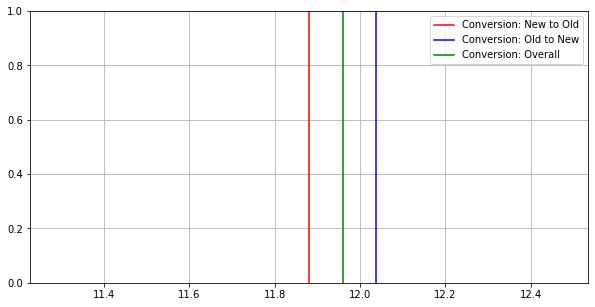

In [34]:
plt.figure(figsize=(10,5))
plt.axvline(df2[df2.group == "treatment"].converted.mean()*100, color= "red", label = "Conversion: New to Old")
plt.axvline(df2[df2.group == "control"].converted.mean()*100, color= "blue", label = "Conversion: Old to New")
plt.axvline(df2.converted.mean()*100, color= "green", label = "Conversion: Overall")
plt.legend();
plt.grid()

**No, we have equal probability to receive both page (50%) and the probability of conversion for both group is similar (around 12%). There is no page that have significant probability of receiving the page over the other.  
This is also clear from the above graph.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

The old page is better:
$$H_0: p_{new} \leq p_{old}: p_{new} - p_{old} \leq 0$$ 
The new page is better:
$$H_1: p_{new} > p_{old}: p_{new} - p_{old} > 0$$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [36]:
p_new_0 = df2.converted.mean()
print("The conversion rate for p_new = {:.2f}%".format(df2.converted.mean()*100))

The conversion rate for p_new = 11.96%


b. What is the **conversion rate** for $p_{old}$ under the null?

In [37]:
p_old_0 = df2.converted.mean()
print("The conversion rate for p_old = {:.2f}%".format(df2.converted.mean()*100))

The conversion rate for p_old = 11.96%


c. What is $n_{new}$, the number of individuals in the treatment group?

In [38]:
n_new = df2[df2.group == 'treatment'].user_id.nunique()
print("The number of individuals in the treatment group is {}".format(n_new))

The number of individuals in the treatment group is 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [39]:
n_old = df2[df2.group == 'control'].user_id.nunique()
print("The number of individuals in the control group is {}".format(n_old))

The number of individuals in the control group is 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [40]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[1-p_new_0, p_new_0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [41]:
old_page_converted = np.random.choice([0,1], size = n_old, p=[1-p_old_0, p_old_0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [42]:
new_page_converted.mean() - old_page_converted.mean()

-0.0013100416834864043

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [43]:
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
size = 10000
bootstrape_new = np.random.binomial(n_new, p_new_0, size)/n_new
bootstrape_old = np.random.binomial(n_old, p_old_0, size)/n_old
p_diffs = bootstrape_new - bootstrape_old

In [44]:
#Another Solution
"""p_diffs = []
for _ in range(10000):
    bootstrape_new = np.random.choice([0,1], size = n_new, p=[1-p_new_0, p_new_0]).mean() 
    bootstrape_old = np.random.choice([0,1], size = n_old, p=[1-p_old_0, p_old_0]).mean() 
    p_diffs.append(bootstrape_new - bootstrape_old)"""

'p_diffs = []\nfor _ in range(10000):\n    bootstrape_new = np.random.choice([0,1], size = n_new, p=[1-p_new_0, p_new_0]).mean() \n    bootstrape_old = np.random.choice([0,1], size = n_old, p=[1-p_old_0, p_old_0]).mean() \n    p_diffs.append(bootstrape_new - bootstrape_old)'

In [45]:
#Another solution
"""# Create sampling distribution for difference in converted rates with boostrapping 
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_samp         = df2.sample(size, replace=True)
    control_mean   = b_samp[b_samp.group == "control"]  .converted.mean()
    treatment_mean = b_samp[b_samp.group == "treatment"].converted.mean()
    p_diffs.append(treatment_mean - control_mean)"""

'# Create sampling distribution for difference in converted rates with boostrapping \np_diffs = []\nsize = df2.shape[0]\nfor _ in range(10000):\n    b_samp         = df2.sample(size, replace=True)\n    control_mean   = b_samp[b_samp.group == "control"]  .converted.mean()\n    treatment_mean = b_samp[b_samp.group == "treatment"].converted.mean()\n    p_diffs.append(treatment_mean - control_mean)'

In [46]:
# convert to numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [47]:
percentile_99_l = np.percentile(p_diffs, 00.5) # 99% confidence level
percentile_99_h = np.percentile(p_diffs, 99.5) # 99% confidence level
percentile_99_l, percentile_99_h

(-0.003057793412833704, 0.002991918465672881)

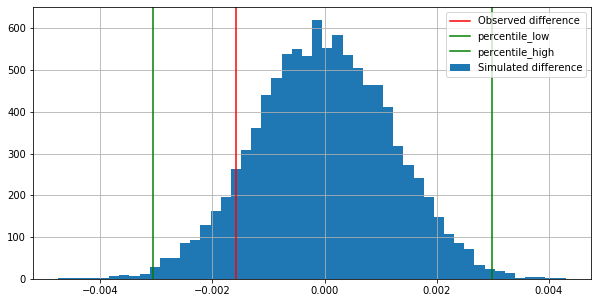

In [48]:
# plot distribution
plt.figure(figsize=(10,5))
plt.hist(p_diffs, bins = 50,                  label = "Simulated difference");
plt.axvline(obs_diff,        color = "red",   label = "Observed difference")
plt.axvline(percentile_99_l, color = "green", label = "percentile_low")
plt.axvline(percentile_99_h, color = "green", label = "percentile_high")
plt.legend();
plt.grid()

In [49]:
p_diffs.mean(), p_diffs.std()

(-1.0590635406667754e-05, 0.0012079093490560326)

The **Centeral Limit Theorem** states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

Yes, it look like what is expected from the **Centeral Limit Theorem**.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [50]:
(p_diffs > obs_diff).mean()

0.9041

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The p_value is greater than 0.05; that's mean that we do not have evidence to regect the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page == "old_page") & (df2.converted == 1)].shape[0]
convert_new = df2[(df2.landing_page == "new_page") & (df2.converted == 1)].shape[0]
n_old = df2[df2.landing_page == "old_page"].shape[0]
n_new = df2[df2.landing_page == "new_page"].shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [52]:
from statsmodels.stats.proportion import proportions_ztest
count = [convert_old, convert_new]
nobs  = [n_old      , n_new]
alternative = 'smaller'
stat, pval = proportions_ztest(count, nobs, value=None, alternative = alternative, prop_var=False)
stat, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Both have p-value around 0.9 that is greater than 0.05 so we will not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression should be used because it is used to predict from only two possible outcomes.**

**In our case, the outcomes are categorical: "no coversion" or "conversion" and they are in the form of 0 and 1**



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df_new = df2.copy()
df_new['intercept'] = 1
df_new['ab_page']   = pd.get_dummies(df2.group, drop_first=True) #1 when an individual receives the treatment and 0 if control.
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [54]:
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html
import statsmodels.api as sm
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-12-15 10:40 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [56]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [57]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

p-value = 0.1899

Its value is differnet than part II because they have different hypothesis.

**Significance**: "ab_page" is not statistically significant because its p-value = 0.1899 > 0.05.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

In the dataframe there is no other data that can be added to the analysis

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [58]:
countries_df = pd.read_csv("countries.csv")
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [59]:
df_new2 = df2.copy()
df_new2['intercept'] = 1
df_new2['ab_page']   = pd.get_dummies(df2.group, drop_first=True) #1 when an individual receives the treatment and 0 if control.

In [60]:
df_new2 = df_new.merge(countries_df, on = "user_id")
df_new2 = df_new2.join(pd.get_dummies(df_new2.country, prefix = "country"))
df_new2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_CA,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [61]:
# Another Solution
"""df_new2 = df_new.set_index('user_id').join(countries_df.set_index('user_id'), on = "user_id")
df_new2.head()"""

'df_new2 = df_new.set_index(\'user_id\').join(countries_df.set_index(\'user_id\'), on = "user_id")\ndf_new2.head()'

In [62]:
df_new2.groupby("country").converted.mean()

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

In [63]:
df_new2.groupby("country").converted.sum()

country
CA     1672
UK     8739
US    24342
Name: converted, dtype: int64

**The conversion rate for each country are close to each other; that indicates that it does not affect the conversion rate**

In [64]:
import statsmodels.api as sm
logit_mod = sm.Logit(df_new2['converted'], df_new2[['intercept', 'country_CA', 'country_UK']])
results2 = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [65]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-12-15 10:40 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
country_CA   -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
country_UK    0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [66]:
np.exp(results2.params)

intercept     0.135779
country_CA    0.960018
country_UK    1.009966
dtype: float64

In [67]:
1/np.exp(results2.params)

intercept     7.364925
country_CA    1.041647
country_UK    0.990133
dtype: float64

**country_CA**: The conversion is 0.960018 times as likely on country_CA than country_US holding all else as constant. For every 1 unit decrease in country_CA, the conversion 1.041647 times as likely holding all else constant.

**country_UK**: The conversion is 1.009966 times as likely on country_UK than country_US holding all else as constant.

**Significance**: The country is not statistically significant because all the p-values are more than 0.05.

**The p-value are high suggesting they were not statistically significant. so the country does not have impact on conversion**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [68]:
df_new3 = df_new2.copy()
df_new3['US_new_page'] = df_new3['country_US'] * df_new3['ab_page']
df_new3['CA_new_page'] = df_new3['country_CA'] * df_new3['ab_page']
df_new3['UK_new_page'] = df_new3['country_UK'] * df_new3['ab_page']

In [69]:
import statsmodels.api as sm
logit_mod = sm.Logit(df_new3['converted'], df_new3[['intercept', 'CA_new_page', 'UK_new_page']])
results3 = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [70]:
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212779.0384
Date:               2020-12-15 10:40 BIC:              212810.7773
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.080850   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
CA_new_page  -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
UK_new_page   0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
==================================================================

"""

In [71]:
np.exp(results3.params)

intercept      0.135840
CA_new_page    0.927579
UK_new_page    1.015000
dtype: float64

In [72]:
1/np.exp(results3.params)

intercept      7.361591
CA_new_page    1.078076
UK_new_page    0.985222
dtype: float64

**CA_new_page**: The conversion is 0.92757 times as likely on CA_new_page than US_new_page holding all else as constant. For every 1 unit decrease in country_CA, the conversion 1.078076 times as likely holding all else constant.

**UK_new_page**: The conversion is 1.015000 times as likely on UK_new_page than US_new_page holding all else as constant.

**Significance**: Only "CA_new_page" is statistically significant because its p-value = 0.0458 < 0.05.

# Conlcusion

We were anlyzing the effect of a new page on the conversion and we found that we will retain the old page implementation.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295